In [1]:
from prony.prony import prony

from prony.TimeDomainData import TimeDomainData

from prony.fitting import (
    get_gammas_and_t,
    get_gamma_matrix, 
    get_correlation_function_matrix,
    get_freq_matrix,
    get_expn,
    optimize
)

from prony.spectral import BO
from prony.spectral import get_spectral_function_from_exponentials
from prony.spectral import bose_function

In [2]:
import numpy as np

In [3]:
beta = 1 / 10
data = TimeDomainData(BO, beta, tf=10, n_Hankel=100)

nmode_real = 0
nmode_imag = 2
expn, etal = prony(data, nmode_real, nmode_imag)

2023-11-24 00:23:27 [info     ] Staring the prony fitting program.
2023-11-24 00:23:27 [info     ] Building the Hankel matrix and running Takagi factorization...
2023-11-24 00:23:28 [info     ] The Hankel process is done!
2023-11-24 00:23:28 [info     ] <Hankel dim=100, with Takagi factorization error (real: 9.918039504822218e-11, imag: 2.909732110475863e-12)>
2023-11-24 00:23:28 [info     ] Solving for the gamma values from the eigen values...
2023-11-24 00:23:28 [info     ] The gamma and t values are solved!
2023-11-24 00:23:28 [info     ] gamma: [0.9743957+0.04221896j 0.9743957-0.04221896j]; t: [-5.+8.66025404j -5.-8.66025404j].
2023-11-24 00:23:28 [info     ] Preparing the matricies for Prony optimization...
2023-11-24 00:23:28 [info     ] Start the minimization...
     pcost       dcost       gap    pres   dres
 0: -2.5983e+03 -3.6250e+03  6e+03  2e+01  1e+00
 1: -3.9724e+03 -4.9198e+03  2e+03  6e+00  3e-01
 2: -4.0743e+03 -4.1999e+03  2e+02  2e-01  9e-03
 3: -4.1040e+03 -4.1183e+

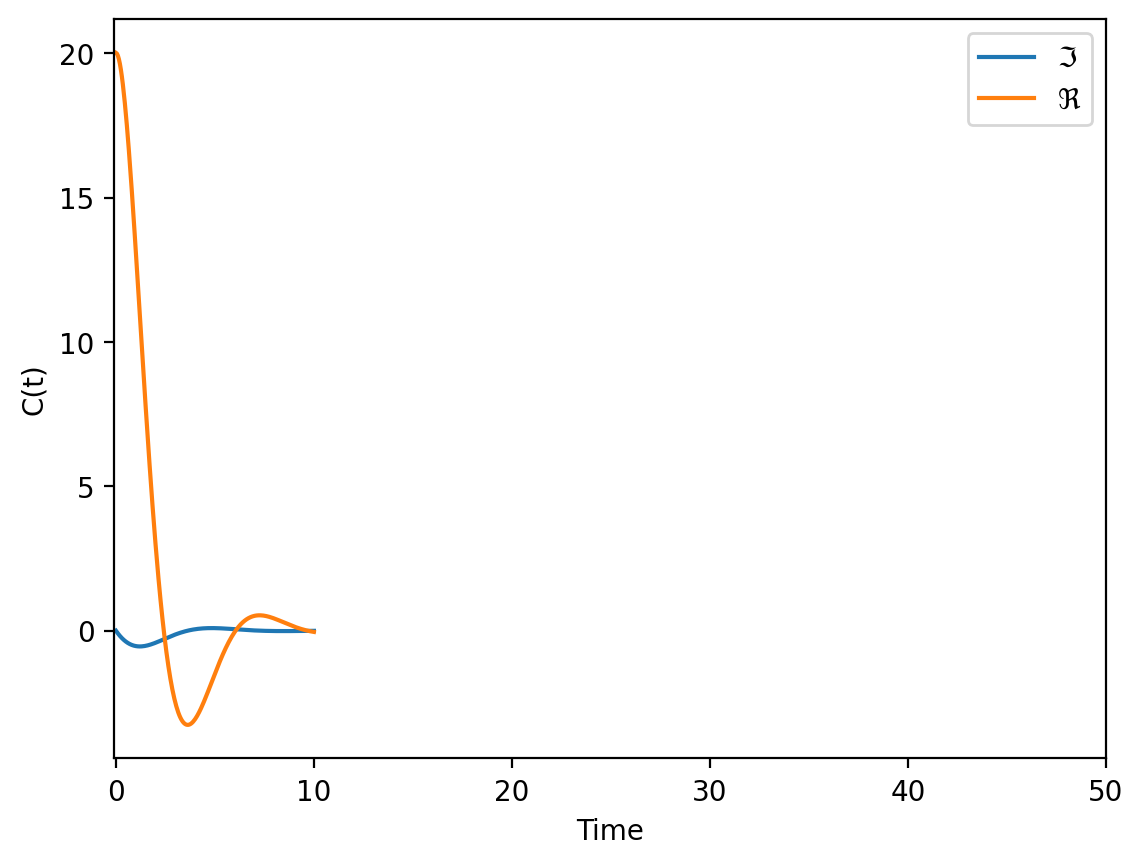

In [4]:
data.plot()

In [5]:
len_ = 10000
spe_wid = 10

w = np.append(np.linspace(-spe_wid, 0, len_), np.linspace(0, spe_wid, len_))
jw_exact = BO(w) * bose_function(w, beta)
jw_prony = get_spectral_function_from_exponentials(w, expn, etal).real

In [6]:
import matplotlib.pyplot as plt

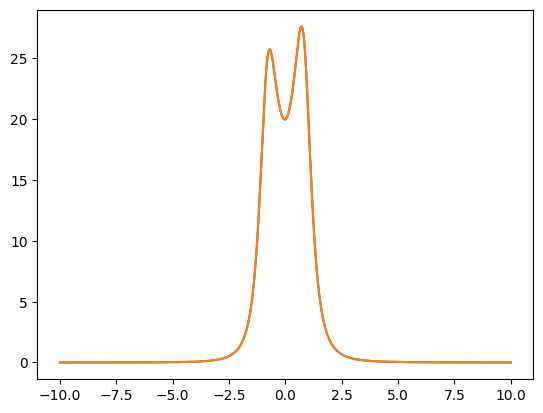

In [7]:
plt.plot(w, jw_exact)
plt.plot(w, jw_prony)

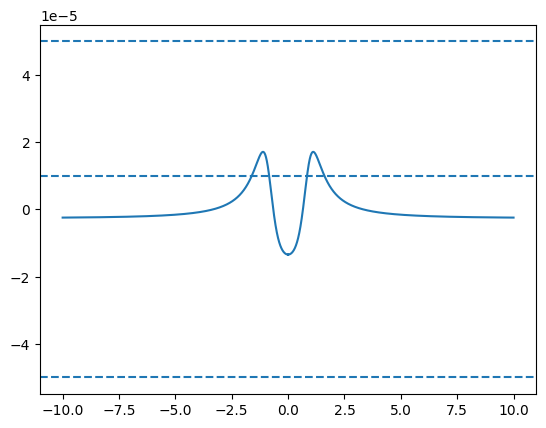

In [8]:
plt.plot(w, jw_exact - jw_prony)
plt.axhline(1e-5, ls='--')
plt.axhline(5e-5, ls='--')
plt.axhline(-5e-5, ls='--')